In [2]:
# Load pyspark, pandas
from pyspark import SparkConf, SparkContext
import pandas as pd
sc = SparkContext.getOrCreate();

In [3]:
# Configure Spark
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")

In [4]:
# Dataset sample
filename = "fhvhv_tripdata_2020-03_short.csv"

In [6]:
# Data parsing
lines = sc.textFile("./data/" + filename) 
header = lines.first()
filtered_lines = lines.filter(lambda row:row != header) # all lines excepting the header

In [7]:
"""
    Run the Spark job
    - map(): apply the transformation on every element of RDD -> new RDD
    - countByValue(): action that returns the count of each unique value
    - x.split(", ")[2]: extract the value of pickup_datetime from a row
    e.g., 2020-03-01 00:03:40
    - .split(" ")[0]: extract the date from the pickup_datetime
    e.g., 2020-03-01
"""

companies = filtered_lines.map(lambda x: x.split(",")[0])
result = companies.countByValue() 

In [8]:
# Save results as a csv file
pd.Series(result, name="companies").to_csv("./data/companies.csv")

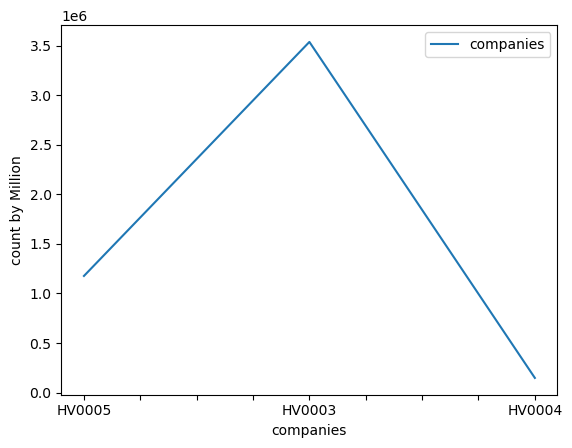

In [9]:
# Visualize the results
import matplotlib.pyplot as plt
%matplotlib inline


companies = pd.read_csv("./data/companies.csv")
companies.plot(x='Unnamed: 0',y = 'companies')
plt.xlabel("companies")
plt.ylabel("count by Million")
plt.show()
